In [28]:
pip install holidays-es

Note: you may need to restart the kernel to use updated packages.


In [29]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
from math import pi, sin, cos
from datetime import datetime
from holidays_es import get_provinces, Province
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras import layers
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [30]:
df = pd.read_csv('raw_data/station_1.csv')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25862 entries, 0 to 25861
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        25862 non-null  int64  
 1   activate            25862 non-null  int64  
 2   name                25862 non-null  object 
 3   reservations_count  25862 non-null  int64  
 4   light               25862 non-null  int64  
 5   total_bases         25862 non-null  int64  
 6   free_bases          25862 non-null  int64  
 7   number              25862 non-null  object 
 8   longitude           25862 non-null  float64
 9   no_available        25862 non-null  int64  
 10  address             25862 non-null  object 
 11  latitude            25862 non-null  float64
 12  dock_bikes          25862 non-null  int64  
 13  id                  25862 non-null  object 
 14  time                25862 non-null  int64  
 15  date                25862 non-null  object 
 16  holi

In [32]:
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

In [33]:
df.year.unique()

array([2018, 2019, 2020, 2021])

In [34]:
temp = df.copy()

In [35]:
#temp['date'] = pd.to_datetime(temp['date'])

In [36]:
temp.shape

(25862, 28)

In [37]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25862 entries, 0 to 25861
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   activate            25862 non-null  int64  
 1   name                25862 non-null  object 
 2   reservations_count  25862 non-null  int64  
 3   light               25862 non-null  int64  
 4   total_bases         25862 non-null  int64  
 5   free_bases          25862 non-null  int64  
 6   number              25862 non-null  object 
 7   longitude           25862 non-null  float64
 8   no_available        25862 non-null  int64  
 9   address             25862 non-null  object 
 10  latitude            25862 non-null  float64
 11  dock_bikes          25862 non-null  int64  
 12  id                  25862 non-null  object 
 13  time                25862 non-null  int64  
 14  date                25862 non-null  object 
 15  holidays            25862 non-null  bool   
 16  date

### Scaling and Encoding :

In [38]:
temp.select_dtypes(['int', 'float']).columns

Index(['activate', 'reservations_count', 'light', 'total_bases', 'free_bases',
       'longitude', 'no_available', 'latitude', 'dock_bikes', 'time',
       'feels_like', 'weekday', 'year', 'month', 'hour_sin', 'hour_cos',
       'weekday_sin', 'weekday_cos', 'month_sin', 'month_cos'],
      dtype='object')

In [39]:
temp.drop_duplicates(inplace=True)

In [40]:
from sklearn.preprocessing import StandardScaler

f_transformer = StandardScaler()

temp[['activate', 'reservations_count', 'light', 'total_bases', 'free_bases', 'longitude', 'no_available', 'latitude', 'time',
       'feels_like', 'hour_sin', 'hour_cos','weekday_sin', 'weekday_cos', 'month_sin', 
      'month_cos']] = f_transformer.fit_transform(temp[['activate', 'reservations_count', 'light', 'total_bases', 'free_bases', 'longitude', 'no_available', 'latitude', 'time',
       'feels_like', 'hour_sin', 'hour_cos',
        'weekday_sin', 'weekday_cos', 'month_sin', 'month_cos']])


In [41]:
temp.columns

Index(['activate', 'name', 'reservations_count', 'light', 'total_bases',
       'free_bases', 'number', 'longitude', 'no_available', 'address',
       'latitude', 'dock_bikes', 'id', 'time', 'date', 'holidays', 'datetime',
       'feels_like', 'weather_main', 'weekday', 'year', 'month', 'hour_sin',
       'hour_cos', 'weekday_sin', 'weekday_cos', 'month_sin', 'month_cos'],
      dtype='object')

In [42]:
temp.holidays = temp.holidays.astype('int')

In [43]:
temp_model = temp.drop(columns=['name', 'number', 'address', 'id', 'datetime'])

In [44]:
temp_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25860 entries, 0 to 25861
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   activate            25860 non-null  float64
 1   reservations_count  25860 non-null  float64
 2   light               25860 non-null  float64
 3   total_bases         25860 non-null  float64
 4   free_bases          25860 non-null  float64
 5   longitude           25860 non-null  float64
 6   no_available        25860 non-null  float64
 7   latitude            25860 non-null  float64
 8   dock_bikes          25860 non-null  int64  
 9   time                25860 non-null  float64
 10  date                25860 non-null  object 
 11  holidays            25860 non-null  int64  
 12  feels_like          25860 non-null  float64
 13  weather_main        25860 non-null  object 
 14  weekday             25860 non-null  int64  
 15  year                25860 non-null  int64  
 16  mont

In [45]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
categorical_features = ['year', 'month', 'weekday', 'weather_main']
transformed_data = pd.DataFrame(ohe.fit_transform(temp_model[categorical_features]))
transformed_data.columns = ohe.get_feature_names(categorical_features)
concatenated_data = pd.concat([temp_model, transformed_data], axis=1)

/home/inesmms/.pyenv/versions/3.8.12/envs/bicimad/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [46]:
temp_model = concatenated_data.drop(columns=['year', 'month', 'weekday', 'weather_main'])

In [47]:
temp_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25862 entries, 0 to 4524
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   activate                   25860 non-null  float64
 1   reservations_count         25860 non-null  float64
 2   light                      25860 non-null  float64
 3   total_bases                25860 non-null  float64
 4   free_bases                 25860 non-null  float64
 5   longitude                  25860 non-null  float64
 6   no_available               25860 non-null  float64
 7   latitude                   25860 non-null  float64
 8   dock_bikes                 25860 non-null  float64
 9   time                       25860 non-null  float64
 10  date                       25860 non-null  object 
 11  holidays                   25860 non-null  float64
 12  feels_like                 25860 non-null  float64
 13  hour_sin                   25860 non-null  floa

### Creating Time steps

In [48]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [49]:
train_size = int(len(temp_model) * 0.8)
test_size = len(temp_model) - train_size
train, test = temp_model.iloc[0:train_size], temp_model.iloc[train_size:len(temp_model)]
print(len(train), len(test))

20689 5173


In [50]:
time_steps = 10

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.dock_bikes, time_steps)
X_test, y_test = create_dataset(test, test.dock_bikes, time_steps)

print(X_train.shape, y_train.shape)

(20679, 10, 53) (20679,)


Model 1: 

In [51]:
model = Sequential()
model.add(
    layers.Bidirectional(
    layers.LSTM(
      units=128,
      input_shape=(X_train.shape[1], X_train.shape[2]),
    ), 
  )
)
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [52]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience = 5)

In [1]:
history = model.fit(
    X_train, y_train, 
    epochs=10, 
    batch_size=64, 
    validation_data=(X_test, y_test),
    shuffle=False,
    callbacks = [early_stop]
)

NameError: name 'model' is not defined

Model 2:

In [138]:
model = Sequential()

model.add(layers.Bidirectional(layers.LSTM(units=128,return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2]))))

model.add(layers.LSTM(units= 128, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(units= 128))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units = 1))

model.compile(optimizer="adam", loss="mean_squared_error", metrics=["acc"])


In [86]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience = 5)

In [87]:
history = model.fit(
    X_train, y_train, 
    epochs=10, 
    batch_size=64, 
    validation_data=(X_test, y_test),
    shuffle=False,
    callbacks = [early_stop]
)

2022-08-30 23:13:40.814671: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 103159680 exceeds 10% of free system memory.


Epoch 1/10
323/323 [==============================] - 17s 41ms/step - loss: 19.4439 - val_loss: nan
Epoch 2/10
323/323 [==============================] - 12s 38ms/step - loss: 8.5210 - val_loss: nan
Epoch 3/10
323/323 [==============================] - 12s 37ms/step - loss: 8.1971 - val_loss: nan
Epoch 4/10
323/323 [==============================] - 14s 42ms/step - loss: 8.0300 - val_loss: nan
Epoch 5/10
323/323 [==============================] - 15s 45ms/step - loss: 7.9127 - val_loss: nan
Epoch 5: early stopping


In [184]:
y_pred = model.predict(X_test)

4/4 [==============================] - 5s 54ms/step


(array([  0.,   0.,   0.,   0.,   0., 127.,   0.,   0.,   0.,   0.]),
 array([ 9.688438,  9.788439,  9.888438,  9.988439, 10.088438, 10.188438,
        10.288439, 10.388438, 10.488439, 10.588438, 10.688438],
       dtype=float32),
 <BarContainer object of 10 artists>)

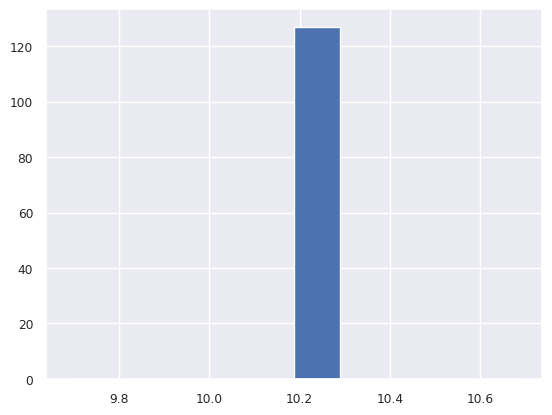

In [185]:
plt.hist(y_pred)